Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Prática com Filtros no domínio da Frequência

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Usando a DFT e FFT da OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [5]:
img = cv2.imread('dataFreq/Fig0424(a)(rectangle).tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = (20*np.log(np.abs(fshift) + 0.00001)/255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)

#cv2.imshow('img',img)

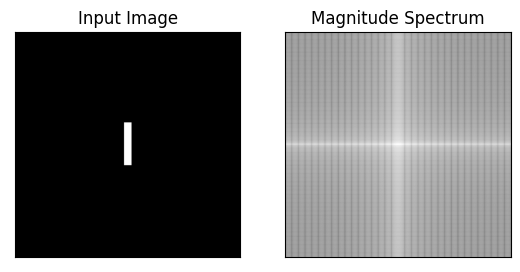

In [6]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


#mostrando a imagem de entrada
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#mostrando a magnitude da TF
cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
img = cv2.imread('dataFreq/t1.jpg',0)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) 
ms = np.array(magnitude_spectrum, dtype=np.float32)

cv2.imshow('img', ms)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [245]:
#criação da filtro PB ideal
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2), np.uint8) # H(u,v)
raio = 60
mask[crow-raio:crow+raio, ccol-raio:ccol+raio] = 1   # filtragem circular

53413


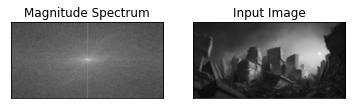

In [248]:
# apply mask and inverse DFT
fshift = dft_shift*mask  # se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])



img_back = np.array(img_back, dtype=np.float32)
print(np.argmax(img_back))
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imshow('img_back', img_back)
cv2.waitKey(0)
cv2.destroyAllWindows()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv para deixar entre 0 e 255
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [254]:
#criação da filtro PA
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows,cols,2), np.uint8)
raio = 10
mask[crow-raio:crow+raio, ccol-raio:ccol+raio] = 0

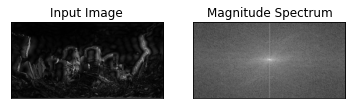

In [255]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)  #inversa da fft
img_back = cv2.idft(f_ishift)        #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Criando outros kernels - Gaussiano e Butterworth 

### Filtro passa-baixa

O filtro passa-baixa, que retém as informações de baixa frequência da transformada de Fourier e filtra as informações de alta frequência, tornará a imagem mais desfocada. Os filtros passa-baixa comumente usados incluem filtro passa-baixo ideal, filtro passa-baixo Butterworth e filtro passa-baixo Gaussiano. Suponha que a altura e a largura da transformada de Fourier sejam H e W, o valor máximo do espectro de Fourier está no ponto central (maxR,maxC) e D(r,c) representa a distância do ponto (r,c) até o ponto central

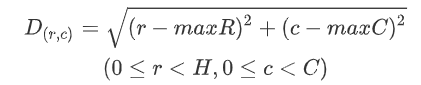

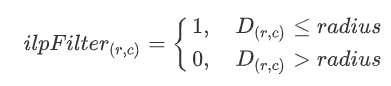

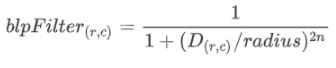

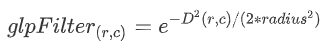

### Filtro passa-alta

O filtro passa-alta retém as informações de alta frequência da imagem e filtra as informações de baixa frequência, o que torna os detalhes da imagem mais óbvios. Os filtros passa-alta comumente usados incluem filtro passa-alto ideal, filtro passa-alto Butterworth e filtro passa-alto gaussiano. Três tipos de filtros passa-altas podem ser expressos da seguinte forma

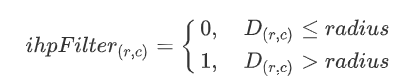

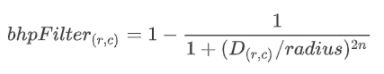

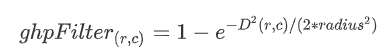

### Filtro passa-banda

O filtro passa-banda serve para reter apenas a banda de frequência de uma determinada área e filtrar as informações de frequência, que podem selecionar seletivamente parte das informações da imagem. Os filtros passa-banda comumente usados incluem filtro passa-banda ideal, filtro passa-banda Butterworth e filtro passa-banda gaussiano. Assumindo que BW representa a largura de banda e D0 representa o centro radial da largura de banda, os três filtros passa banda podem ser expressos da seguinte forma

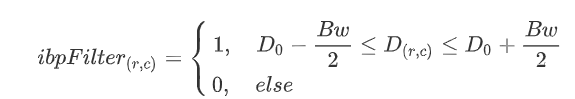

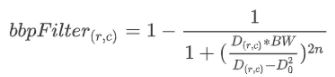

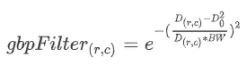

### Filtro rejeita-banda

Em contraste com o filtro passa-banda, o filtro de rejeita-banda se refere a filtrar ou enfraquecer a banda de frequência na faixa especificada. Os filtros de rejeita-banda comumente usados incluem filtro de parada de banda ideal, filtro de parada de banda Butterworth e filtro de parada de banda Gaussiana. Os três filtros de parada de banda são representados da seguinte forma

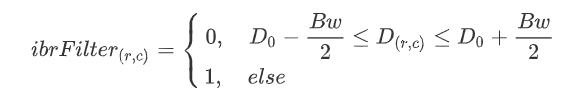

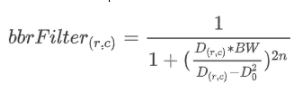

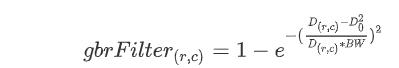

### Funções

In [256]:
def createPB(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # ideal low-pass filter
        lpFilter = np.copy(d)
        lpFilter[lpFilter < pow(radius, 2.0)] = 1
        lpFilter[lpFilter >= pow(radius, 2.0)] = 0
    elif lpType == 1: #Butterworth low-pass filter 
        lpFilter = 1.0 / (1 + np.power(np.sqrt(d)/radius, 2*n))
    elif lpType == 2: # Gaussian low pass filter
        lpFilter = np.exp(-d/(2*pow(radius, 2.0)))
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix


def createPA(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal high pass filter
        lpFilter = np.copy(d)
        lpFilter[lpFilter < pow(radius, 2.0)] = 0
        lpFilter[lpFilter >= pow(radius, 2.0)] = 1
    elif lpType == 1: #Butterworth Highpass Filters 
        lpFilter = 1.0 - 1.0 / (1 + np.power(np.sqrt(d)/radius, 2*n))
    elif lpType == 2: # Gaussian Highpass Filter 
        lpFilter = 1.0 - np.exp(-d/(2*pow(radius, 2.0)))
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix

def createPF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(c, 2.0) + np.power(r, 2.0))
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal bandpass filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = 1
        lpFilter[d > (bandCenter+bandWidth/2)] = 0
        lpFilter[d < (bandCenter-bandWidth/2)] = 0
    elif lpType == 1: #Butterworth bandpass filter
        lpFilter = 1.0 - 1.0 / (1 + np.power(d*bandWidth/(d - pow(bandCenter,2)), 2*n))
    elif lpType == 2: # Gaussian bandpass filter
        lpFilter = np.exp(-pow((d-pow(bandCenter,2))/(d*bandWidth), 2))
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix


def createRF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(c, 2.0) + np.power(r, 2.0))
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal band stop filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = 0
        lpFilter[d > (bandCenter+bandWidth/2)] = 1
        lpFilter[d < (bandCenter-bandWidth/2)] = 1
    elif lpType == 1: #Butterworth band stop filter
        lpFilter = 1.0 / (1 + np.power(d*bandWidth/(d - pow(bandCenter,2)), 2*n))
    elif lpType == 2: # Gaussian band stop filter
        lpFilter = 1 - np.exp(-pow((d-pow(bandCenter,2))/(d*bandWidth), 2))
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix

In [257]:
img = cv2.imread('dataFreq/t1.jpg',0)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) 

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

magnitude_spectrum = np.abs(magnitude_spectrum)
magnitude_spectrum -= magnitude_spectrum.min()
magnitude_spectrum = magnitude_spectrum*255 / magnitude_spectrum.max()
magnitude_spectrum = magnitude_spectrum.astype(np.uint8)

cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [258]:
nrows, ncols = dft_shift.shape[:2]
real = np.power(dft_shift[:, :, 0], 2.0)
imaginary = np.power(dft_shift[:, :, 1], 2.0)
amplitude = np.sqrt(real+imaginary)
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(amplitude)

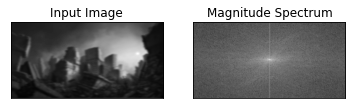

In [261]:
#maskPB = createPB(dft_shift.shape, center=(int(ncols/2), int(nrows/2)), radius=35, lpType=0, n=2)
maskPB = createPB(dft_shift.shape, center=maxLoc, radius=35, lpType=1, n=2)

filtered_freq = dft_shift*maskPB
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft
img_back = cv2.idft(f_ishift)        #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()




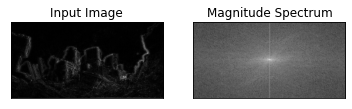

In [267]:
#maskPA = createPA(dft_shift.shape, center=(int(ncols/2), int(nrows/2)), radius=35, lpType=0, n=2)
maskPA = createPA(dft_shift.shape, center=maxLoc, radius=35, lpType=1, n=1)

filtered_freq = dft_shift*maskPA
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft
img_back = cv2.idft(f_ishift)        #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-256-d7e6c32cb770>:55: RuntimeWarning: divide by zero encountered in true_divide
  lpFilter = np.exp(-pow((d-pow(bandCenter,2))/(d*bandWidth), 2))


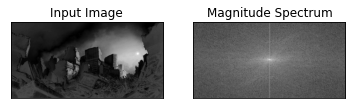

In [272]:
#maskPF = createPF(dft_shift.shape, center=(int(ncols/2), int(nrows/2)), radius=35, lpType=0, n=2);
maskPF = createPF(shape=dft_shift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)

filtered_freq = dft_shift*maskPF
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft
img_back = cv2.idft(f_ishift)        #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-256-d7e6c32cb770>:76: RuntimeWarning: divide by zero encountered in true_divide
  lpFilter = 1 - np.exp(-pow((d-pow(bandCenter,2))/(d*bandWidth), 2))


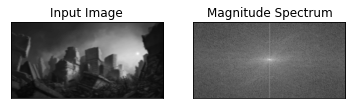

In [274]:
#maskPF = createPF(dft_shift.shape, center=(int(ncols/2), int(nrows/2)), radius=35, lpType=0, n=2);
maskPF = createRF(shape=dft_shift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

filtered_freq = dft_shift*maskPF
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft
img_back = cv2.idft(f_ishift)        #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()